In [22]:
!pip install statsmodels

In [1]:
import numpy as np 
import pandas as pd
import scipy as sp
import missingno as msno
import seaborn as sns
from  matplotlib import pyplot as plt
from IPython.display import display

# Data 

Let's Explore our data

In [2]:
data=pd.read_csv("marketing_campaign.csv",sep=";")
data.columns
data.dtypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

-AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise 

-AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise

-AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise

-AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise

-AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise

Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise

Complain - 1 if customer complained in the last 2 years

DtCustomer - date of customer’s enrolment with the company

Education - customer’s level of education

Marital - customer’s marital status

Kidhome - number of small children in customer’s household

Teenhome - number of teenagers in customer’s household
 
Income - customer’s yearly household income
 
 
MntFishProducts - amount spent on fish products in the last 2 years

MntMeatProducts - amount spent on meat products in the last 2 years

MntFruits - amount spent on fruits products in the last 2 years

MntSweetProducts - amount spent on sweet products in the last 2 years

MntWines - amount spent on wine products in the last 2 years

MntGoldProds - amount spent on gold products in the last 2 years

NumDealsPurchases - number of purchases made with discount

NumCatalogPurchases - number of purchases made using catalogue

NumStorePurchases - number of purchases made directly in stores

NumWebPurchases - number of purchases made through company’s web site

NumWebVisitsMonth - number of visits to company’s web site in the last month

Recency - number of days since the last purchase


In [9]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


# Data Cleaning

In [11]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

# Carte de chaleur 

As we can see We have 24 missing values for the feature income , and it's the only feature with missing values. Let's see the percentage. 

Text(95.72222222222221, 0.5, 'Index des entrées')

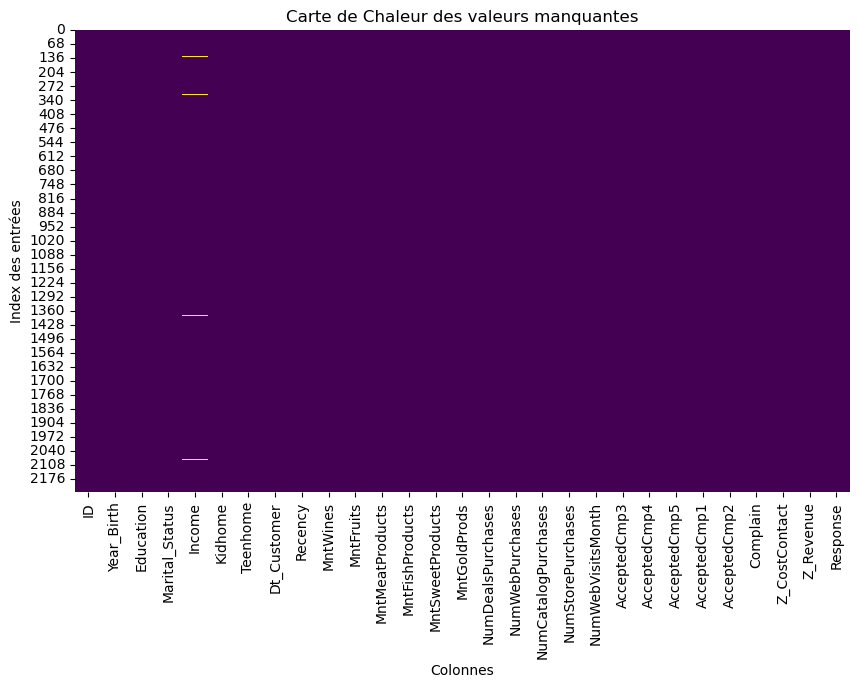

In [19]:
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull(),cbar=False,cmap='viridis')
plt.title("Carte de Chaleur des valeurs manquantes")
plt.xlabel('Colonnes')
plt.ylabel('Index des entrées')

Une colonne contient des valeurs manquantes et c'est la colonne income

# Renommage des variables

In [3]:
colonnes_actuelles = data.columns.tolist()
colonnes_actuelles 


['ID',
 'Year_Birth',
 'Education',
 'Marital_Status',
 'Income',
 'Kidhome',
 'Teenhome',
 'Dt_Customer',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Z_CostContact',
 'Z_Revenue',
 'Response']

In [6]:
nouvelles_colonnes={
    'ID': 'Identifiant',
    'Year_Birth': 'Annee_Naissance',
    'Education': 'Niveau_Education',
    'Marital_Status': 'Statut_Marital',
    'Income': 'Revenu',
    'Kidhome': 'Nb_Enfants',
    'Teenhome': 'Nb_Adolescents',
    'Dt_Customer': 'Date_Inscription',
    'Recency': 'Recence_Achat',
    'MntWines': 'Depenses_Vins',
    'MntFruits': 'Depenses_Fruits',
    'MntMeatProducts': 'Depenses_Viandes',
    'MntFishProducts': 'Depenses_Poissons',
    'MntSweetProducts': 'Depenses_Sucreries',
    'MntGoldProds': 'Depenses_Or',
    'NumDealsPurchases': 'Achats_Promos',
    'NumWebPurchases': 'Achats_Web',
    'NumCatalogPurchases': 'Achats_Catalogue',
    'NumStorePurchases': 'Achats_Magasin',
    'NumWebVisitsMonth': 'VisitesWeb_Mois',
    'AcceptedCmp3': 'Campagne3_Acceptee',
    'AcceptedCmp4': 'Campagne4_Acceptee',
    'AcceptedCmp5': 'Campagne5_Acceptee',
    'AcceptedCmp1': 'Campagne1_Acceptee',
    'AcceptedCmp2': 'Campagne2_Acceptee',
    'Complain': 'Plainte',
    'Z_CostContact': 'Cout_Contact', 
    'Z_Revenue': 'Revenu_Z', 
    'Response': 'Reponse'
}

In [7]:
data.rename(columns=nouvelles_colonnes,inplace=True)
data

,Identifiant,Annee_Naissance,Niveau_Education,Statut_Marital,Revenu,Nb_Enfants,Nb_Adolescents,Date_Inscription,Recence_Achat,Depenses_Vins,...,VisitesWeb_Mois,Campagne3_Acceptee,Campagne4_Acceptee,Campagne5_Acceptee,Campagne1_Acceptee,Campagne2_Acceptee,Plainte,Cout_Contact,Revenu_Z,Reponse
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [ ]:
# data['Dt_Customer']=pd.to_datetime(data['Dt_Customer'])

# Analyse uni et bivariée

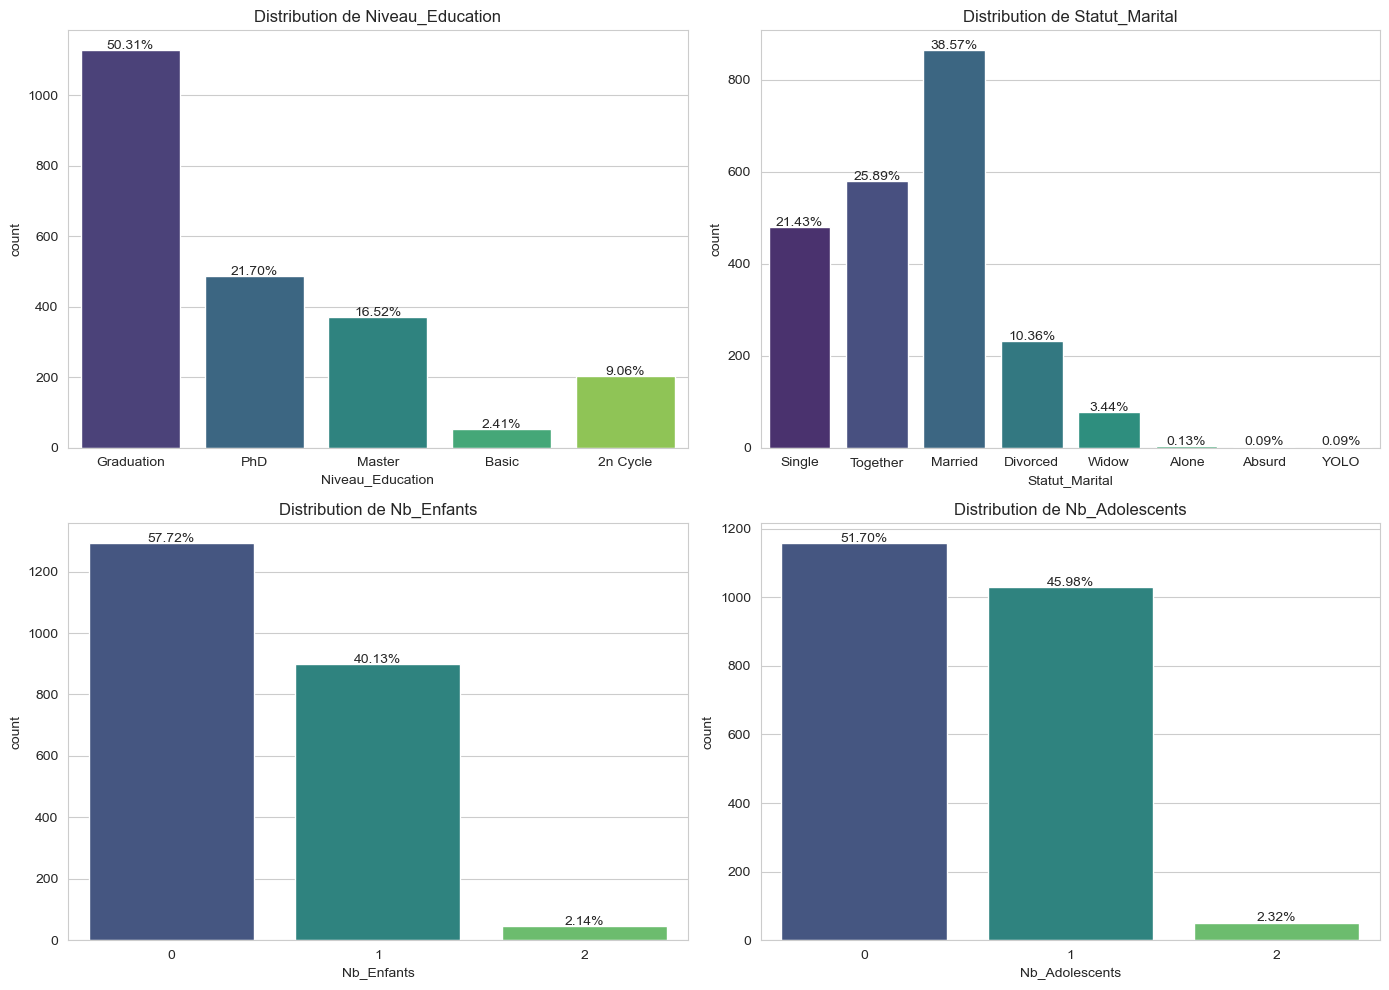

In [8]:
with sns.axes_style("whitegrid"):
    # Création de la figure et des sous-graphiques
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # Liste des variables à visualiser
    colonnes = ['Niveau_Education', 'Statut_Marital', 'Nb_Enfants', 'Nb_Adolescents']
    
    # Boucle pour générer un countplot pour chaque variable
    for i, col in enumerate(colonnes):
        ax = axes[i // 2, i % 2]  # Sélection de l'axe à utiliser
        total = float(len(data[col]))  # Calcul du total de la variable
        
        # Création du countplot
        sns.countplot(x=col, data=data, palette="viridis", ax=ax)
        ax.set_title(f'Distribution de {col}')
        
        # Ajout des pourcentages au-dessus des barres
        for p in ax.patches:
            height = p.get_height()  # Hauteur de la barre
            ax.text(p.get_x() + p.get_width() / 2,  # Position x pour le texte
                    height + 3,  # Position y pour le texte (au-dessus de la barre)
                    '{:1.2f}%'.format(100 * height / total),  # Calcul du pourcentage
                    ha="center", fontsize=10)  # Positionnement du texte au centre de la barre

    # Ajustement de la mise en page pour éviter les chevauchements
    plt.tight_layout()

    # Affichage du graphique
    plt.show()


In [49]:
#Voir les doublons
data.duplicated().sum()
#Pas de doublons

0

# Visualisation des variables de comptage

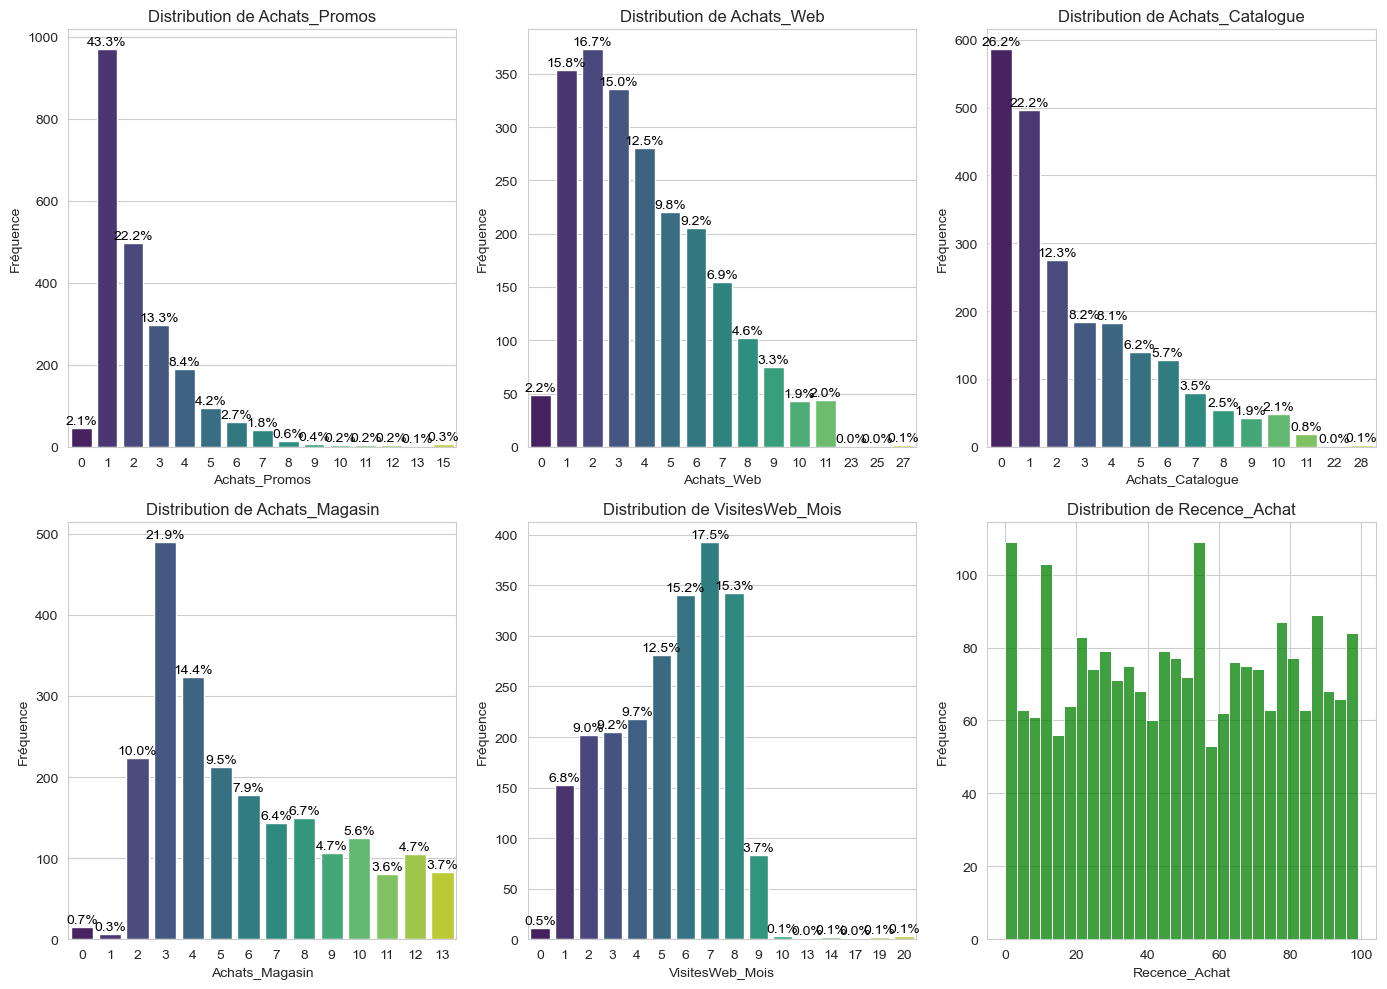

In [9]:
with sns.axes_style("whitegrid"):
    # Liste des variables à analyser
    variables = ['Achats_Promos', 'Achats_Web', 'Achats_Catalogue', 'Achats_Magasin', 'VisitesWeb_Mois', 'Recence_Achat']
    
    # Création de la figure et des axes pour les graphiques
    fig, axes = plt.subplots(2, 3, figsize=(14, 10))
    axes = axes.flatten()  # Aplatir les axes pour faciliter l'accès
    
    # Boucle pour générer des visualisations pour chaque variable
    for i, var in enumerate(variables):
        ax = axes[i]
        total = data[var].notnull().sum()  # Calcul du nombre total de valeurs non nulles
        
        if var == 'Recence_Achat':
            # Utiliser un histogramme pour 'Recence_Achat'
            histplot = sns.histplot(data[var], bins=30, ax=ax, color='green')
        else:
            # Utiliser des countplots pour les autres variables
            countplot = sns.countplot(x=var, data=data, ax=ax, palette='viridis')
        
        # Ajouter le titre et les labels aux axes
        ax.set_title(f'Distribution de {var}')
        ax.set_xlabel(var)
        ax.set_ylabel('Fréquence')
        
        # Ajouter les pourcentages sur les barres pour les countplots
        if var != 'Recence_Achat':
            for p in ax.patches:
                percentage = '{:.1f}%'.format(100 * p.get_height() / total)  # Calcul du pourcentage
                x = p.get_x() + p.get_width() / 2  # Position x pour l'annotation
                y = p.get_height()  # Position y pour l'annotation
                ax.annotate(percentage, (x, y), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

    # Ajustement de la mise en page pour éviter les chevauchements
    plt.tight_layout()

    # Affichage du graphique
    plt.show()


# Interpretation

 Achat_Promo : Nos clients sont enclin à profiter des autres de Promos, et ils en font généralement un achat par promo(43.3%), tandis qu'il y 'en a qui en font deux (22.2%). Le numbre d'achat par promotion diminue progréssivement .
Achat_web: Nos clients réalisent en partie leur achat sur le web , chose que l'on peut remarquer avec la distribution de 'Achat_web'. Cela montre l'importance du canal web. 
Achat_catalogue: 26.2% des clients ne font pas d'achat via un catalogue , le nombre d'achat via le cataloge diminue progressivement . Ainsi , on remarque que les client utilisent le catalogue  avec modération.
Achat_Magasin: 21.9% de nos clients effectuent 3 fois leurs achats en magasin , 14.4% 4 fois , rare sont ceux qui en font jamais ou une fois .  Les clients ont donc tendances à faire pas mal d'achats en magasin de façon modérer. 
VisiteWeb_Mois: Pas mal de nos clients naviguent sur le site web. Ceci suggère qu'ils interagissent beaucoup avec le site web 

# Visualisation des variables quantitatives 

Nous nous focalisons ici sur leurs comportement de dépenses.

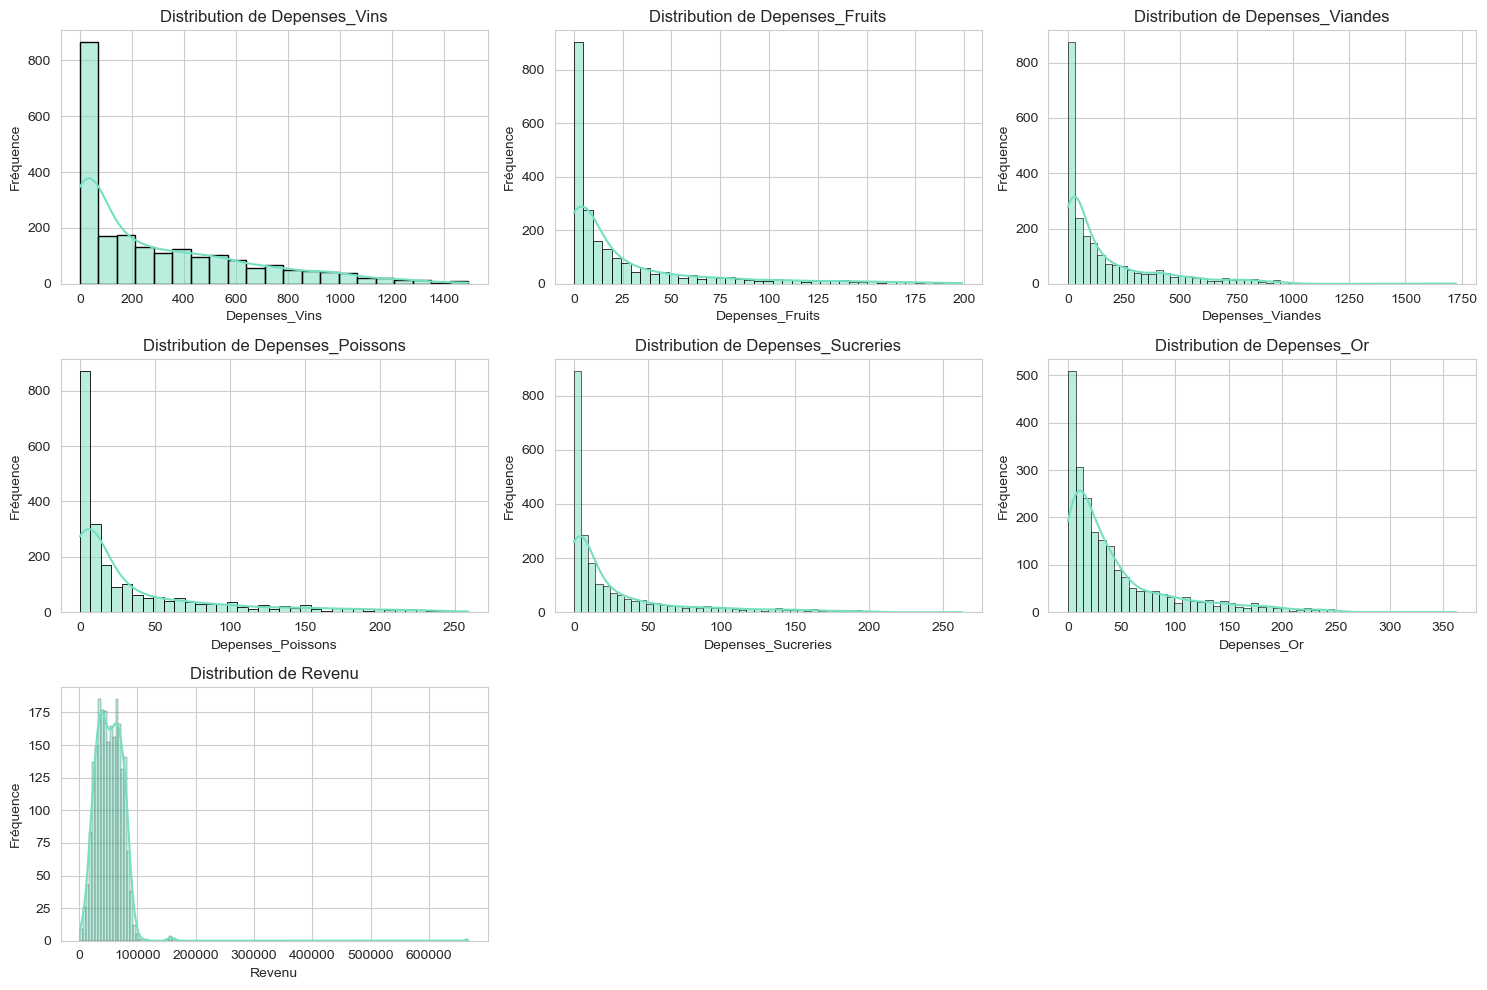

,count,mean,std,min,25%,50%,75%,max
Depenses_Vins,2240.0,303.94,336.60,0.0,23.75,173.5,504.25,1493.0
Depenses_Fruits,2240.0,26.30,39.77,0.0,1.00,8.0,33.00,199.0
Depenses_Viandes,2240.0,166.95,225.72,0.0,16.00,67.0,232.00,1725.0
Depenses_Poissons,2240.0,37.53,54.63,0.0,3.00,12.0,50.00,259.0
Depenses_Sucreries,2240.0,27.06,41.28,0.0,1.00,8.0,33.00,263.0
Depenses_Or,2240.0,44.02,52.17,0.0,9.00,24.0,56.00,362.0
Revenu,2216.0,52247.25,25173.08,1730.0,35303.00,51381.5,68522.00,666666.0


In [10]:
with sns.axes_style("whitegrid"):
    depenses_variables = ['Depenses_Vins', 'Depenses_Fruits', 'Depenses_Viandes',
                          'Depenses_Poissons', 'Depenses_Sucreries', 'Depenses_Or', 'Revenu']
    fig, axes = plt.subplots(3, 3, figsize=(15, 10))
    axes = axes.flatten()
    for i, var in enumerate(depenses_variables):
        ax = axes[i]
        sns.histplot(data[var], kde=True, ax=ax, color='#75DFC1', edgecolor='black')
        ax.set_title(f'Distribution de {var}')
        ax.set_xlabel(var)
        ax.set_ylabel('Fréquence')
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    plt.tight_layout()
    plt.show()
    
    description=data[depenses_variables].describe()
    description_arr=description.round(2)
    display(description_arr.T)


# Interpretation 



La moyenne des revenus de nos clients est de : 52247.25$ avec un ecart-type de 25173.08 ce qui montre une variabilité significative des revenus dans notre série , le client ayant le plus haut niveau de revenu a un revenu de 666666.0 et le client ayant le revenu minimum avec un revenu de 1730.0( On parle ici des revenus observés). 
La médiane des revenus, qui s'élève à 51 381,50 , indique que la moitié des clients perçoit un revenu inférieur à ce montant, tandis que l'autre moitié gagne davantage. Le premier quartile, à 35 303 , révèle que 25 % des clients disposent de revenus plus modestes, tandis que le troisième quartile, à 68 522 , met en évidence que 25 % des clients bénéficient de revenus significativement plus élevés. 
Cette information peut être utile pour segmenter les clients en fonction de leur pouvoir d’achat et adapter des offres ou stratégies marketing spécifiques.
        Analyse des dépenses: 
 
 L'analyse des dépenses des clients met en lumière leurs habitudes d'achat. En moyenne, les dépenses en vins s'élèvent à 303,94 , avec un maximum de 1 493 , révélant un attrait marqué pour les produits haut de gamme chez certains clients.

Les achats de fruits affichent une moyenne de 26,30  et un maximum de 199 , tandis que ceux de viandes atteignent 166,95  en moyenne, avec des dépenses pouvant aller jusqu'à 1 725 , illustrant une diversité dans les comportements d'achat, allant de consommations modérées à des achats plus conséquents.

Les dépenses en poissons (37,53  en moyenne, jusqu'à 259 ) et en sucreries (27,06 en moyenne, jusqu'à 263 ) restent globalement plus contenues, bien que certains pics puissent traduire des préférences spécifiques ou des achats occasionnels de produits premium.

Enfin, les achats de produits en or, avec une moyenne de 44,02  et un maximum de 362 , semblent davantage correspondre à des achats ponctuels ou des cadeaux.

Ces données révèlent une clientèle aux préférences variées, avec une affinité pour les produits de qualité et de luxe dans certaines catégories. Elles offrent ainsi des opportunités pour des stratégies marketing ciblées, axées sur les segments premium afin de mieux répondre aux attentes des clients.
 

# Visualisation des variables de campagnes:

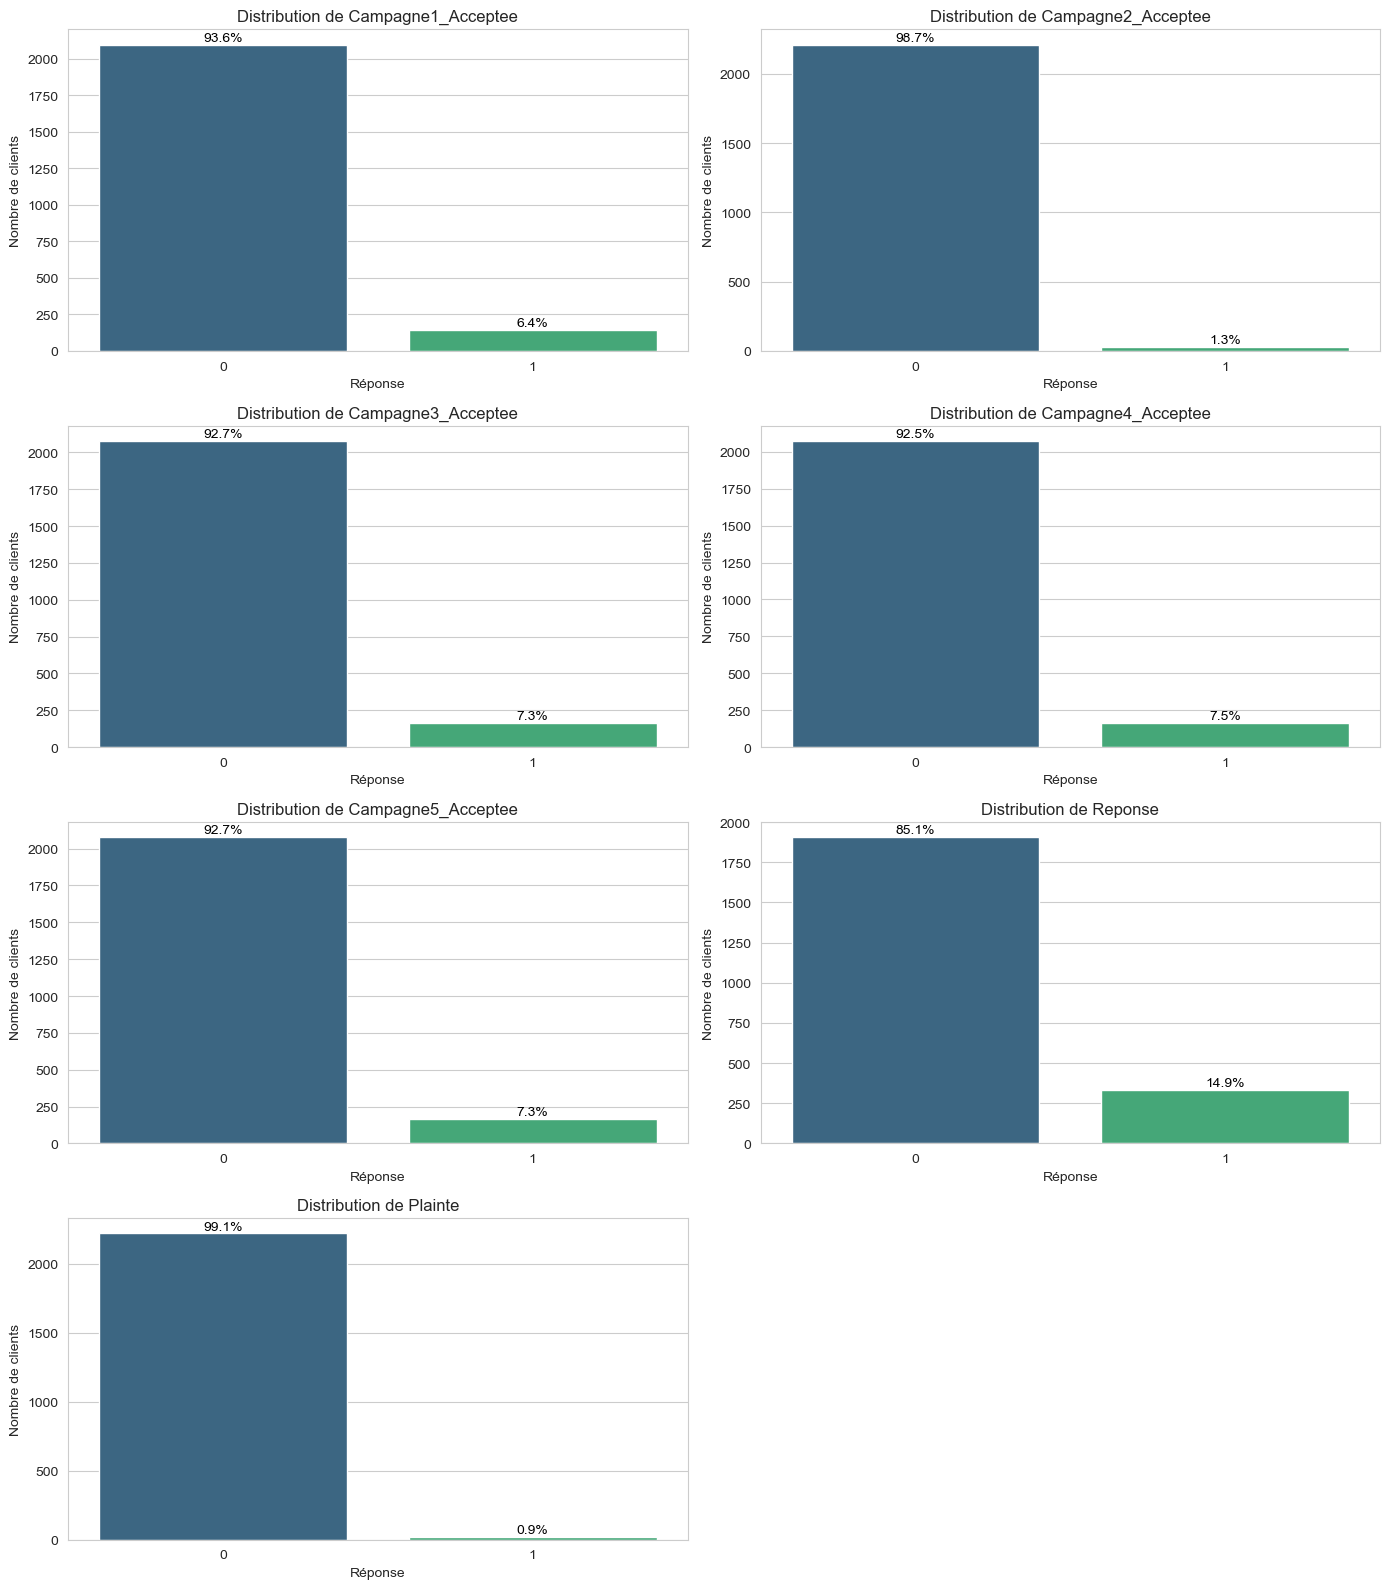

In [11]:
campagnes_variables = ['Campagne1_Acceptee', 'Campagne2_Acceptee', 'Campagne3_Acceptee', 
                       'Campagne4_Acceptee', 'Campagne5_Acceptee', 'Reponse', 'Plainte']

with sns.axes_style("whitegrid"):
    # Création d'un sous-graphe avec 4 lignes et 2 colonnes pour afficher chaque variable
    fig, axes = plt.subplots(4, 2, figsize=(14, 16))
    axes = axes.flatten()  # Aplatir l'array des axes pour faciliter l'accès

    # Affichage des countplots pour chaque variable dans la liste
    for i, var in enumerate(campagnes_variables):
        ax = axes[i]
        total = data[var].notnull().sum()  # Calcul du nombre total de valeurs non nulles
        countplot = sns.countplot(x=var, data=data, ax=ax, palette='viridis')  # Création du countplot
        ax.set_title(f'Distribution de {var}')  # Titre du graphique
        ax.set_xlabel('Réponse')  # Label de l'axe x
        ax.set_ylabel('Nombre de clients')  # Label de l'axe y
        
        # Calcul et ajout du pourcentage sur les barres du countplot
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height() / total)  # Calcul du pourcentage
            x = p.get_x() + p.get_width() / 2  # Position x pour l'annotation
            y = p.get_height()  # Position y pour l'annotation
            ax.annotate(percentage, (x, y), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

    # Supprimer les axes inutilisés si le nombre de variables est inférieur au nombre d'axes
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Ajustement de l'espacement des graphiques pour éviter les chevauchements
    plt.tight_layout()

    # Affichage du graphique
    plt.show()

    

# Interpretation

Nos analyses des réponses aux campagnes marketing et des plaintes clients révèlent des insights essentiels.
-Réponses aux campagnes marketing:
Les taux d'acceptation varient selon les campagnes, avec des résultats plus faibles pour les premières tentatives  et une légère amélioration pour les suivantes. La variable "Réponse", qui mesure l’acceptation de l’offre lors de la dernière campagne, indique que la majorité des client n'a pas repondu à la derniere campagne . Cela souligne la nécessité d’affiner les stratégies marketing pour mieux répondre aux attentes des clients.
-Niveau de satisfaction des clients
Concernant la variable "Plainte", seuls 0,9 % des clients ont signalé une insatisfaction, suggérant un taux de satisfaction globalement élevé, avec 99,1 % des clients n’ayant exprimé aucune plainte officielle.
-Enjeux et opportunités
Ces résultats mettent en évidence deux axes d’optimisation :

1)Améliorer l’efficacité des campagnes marketing en affinant le ciblage et l’approche pour accroître les taux d’acceptation.

2)Maintenir un niveau élevé de satisfaction client, en surveillant les retours et en ajustant les offres en fonction des besoins exprimés.

Ces données constituent une base solide pour l’ajustement des stratégies futures, afin d’augmenter l’engagement client tout en préservant une relation de confiance.

Prétraitement des données: 
Le prétraitement des données est une étape essentielle pour garantir la qualité de notre analyse et la performance de nos modèles de machine learning. Nous nous concentrerons sur trois aspects clés : l'imputation des valeurs manquantes, la discrétisation des variables continues et le regroupement des modalités.
1. Imputation des Valeurs Manquantes: 
Lorsqu'une variable contient des valeurs manquantes, il est crucial de les traiter afin d'éviter des biais dans l’analyse.
Lorsqu'une variable contient des valeurs manquantes, il est crucial de les traiter afin d'éviter des biais dans l’analyse. Pour la variable "Revenu", nous avons opté pour une imputation par la médiane.

Cette décision repose sur l’analyse de la distribution des revenus, qui montre une forte dispersion :

Moyenne : 52 247,25 
Médiane : 51 381,50 
L'écart entre la moyenne et la médiane suggère une distribution asymétrique, probablement influencée par des valeurs extrêmes. Dans ce contexte, la médiane est plus robuste que la moyenne, car elle est moins affectée par les valeurs aberrantes. En l’utilisant, nous assurons une estimation plus fiable du revenu typique de nos clients, sans distorsion due aux extrêmes.

2. Discrétisation des Variables Continues et Calcul de l’Âge et de l’Ancienneté

Pour faciliter l’analyse et la modélisation, nous transformerons certaines variables continues en catégories.

-Revenu et Dépenses (Vins, Fruits, Viandes, Poissons, Sucreries, Or) : Ces variables seront discrétisées en classes définies à partir de leurs statistiques descriptives, afin d’identifier des tendances plus facilement exploitables.

-Âge des clients : Calculé à partir de leur année de naissance, en prenant 2017 comme année de référence.

-Ancienneté des clients : Déduite de leur date d’inscription, permettant d’évaluer leur fidélité.

3. Regroupement des Modalités
Certaines variables catégoriques présentent des modalités peu fréquentes, ce qui peut compliquer l’interprétation et affecter la performance des modèles. Nous regrouperons les catégories rares pour simplifier l’analyse, notamment pour :

-Statut marital

-Achats (Promotions, Web, Catalogue, Magasin)

-Visites Web par mois

-Réponses aux campagnes marketing



Ces étapes de prétraitement rigoureux visent à garantir une meilleure qualité des données et à optimiser les performances de nos analyses et modèles prédictifs. L’imputation par la médiane préserve la robustesse des revenus, la discrétisation facilite l’interprétation des variables continues, et le regroupement des modalités simplifie l’analyse des variables catégoriques.



# Traitement poussé 

# Imputation de la variable 'revenu'

In [12]:
revenu_median = data['Revenu'].median()
data['Revenu'].fillna(revenu_median, inplace=True)
stat_revenu=data['Revenu'].describe().round(2)
stat_revenu_df=pd.DataFrame(stat_revenu)
display(stat_revenu_df.T)

,count,mean,std,min,25%,50%,75%,max
Revenu,2240.0,52237.98,25037.96,1730.0,35538.75,51381.5,68289.75,666666.0


# Discrétisation de la Variable 'Revenu'

Nous segmenterons les revenus en quatre catégories distinctes en utilisant les quartiles.

En nous appuyant sur les statistiques descriptives, nous établirons les seuils de chaque catégorie comme suit :
-Bas Revenu : Revenus inférieurs au premier quartile (moins de 35 303 ).

-Revenu Moyen-Bas : Revenus compris entre le premier quartile et la médiane (de 35 303  à 51 381,5 ).

-Revenu Moyen-Haut : Revenus compris entre la médiane et le troisième quartile (de 51 381,5  à 68 522 ).

-Haut Revenu : Revenus supérieurs au troisième quartile (plus de 68 522 ).

In [13]:
quartile1=data['Revenu'].quantile(0.25)
quartile2=data['Revenu'].quantile(0.5)  # Médiane
quartile3 = data['Revenu'].quantile(0.75)
def categorize_revenue(revenue):
    if revenue <= quartile1:
        return 'inf_35,303€'  # Revenus inférieurs au premier quartile
    elif quartile1 < revenue <= quartile2:
        return '[35,303€_et_51,381.5€['  # Revenus entre le premier quartile et la médiane
    elif quartile2 < revenue <= quartile3:
        return '[51,381.5€_et_68,522€['  # Revenus entre la médiane et le troisième quartile
    else:
        return 'sup_68,522€'  # Revenus supérieurs au troisième quartile
    
data['Categorie_Revenu'] = data['Revenu'].apply(categorize_revenue)
#data['Categorie_Revenu']

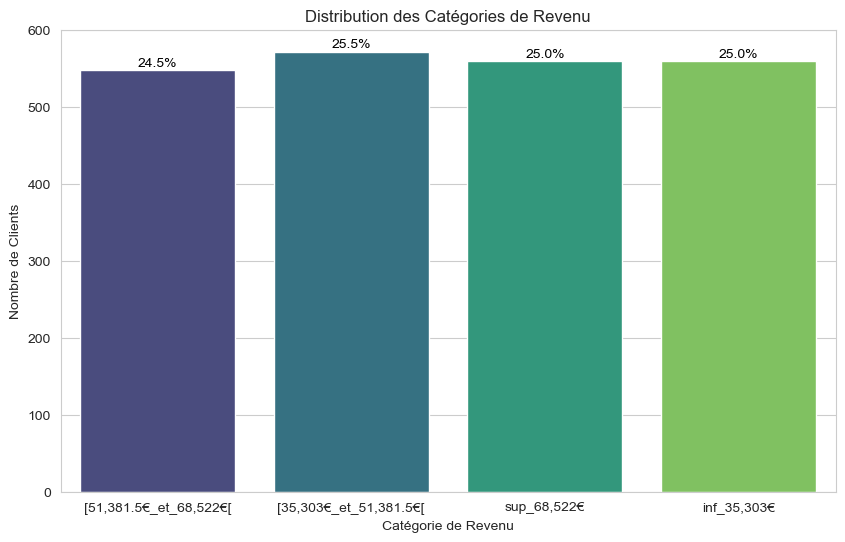

In [16]:
#Data Viz

with sns.axes_style("whitegrid"):
    plt.figure(figsize=(10, 6))
    
    # Création du graphique avec countplot
    ax = sns.countplot(x='Categorie_Revenu', data=data, palette='viridis')
    
    # Titre et labels des axes
    ax.set_title('Distribution des Catégories de Revenu')
    ax.set_xlabel('Catégorie de Revenu')
    ax.set_ylabel('Nombre de Clients')

    # Calcul et affichage des pourcentages sur les barres
    total = len(data['Categorie_Revenu'])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        
        # Annotation des pourcentages sur les barres
        ax.annotate(percentage, (x, y), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

    # Affichage du graphique
    plt.show()


1. Interpretation  des Catégories de Revenu Après Discrétisation
    La discrétisation de la variable 'Revenu' en quatre catégories basées sur les quartiles permet de constater une répartition assez équilibrée entre ces différentes tranches. Chaque catégorie représente une part significative de la clientèle :
    
    -Revenus entre 35,303  et 51,381,5  : Représentent 25,54 % de l'ensemble des clients.
    
    -Revenus supérieurs à 68,522  : Constituent également 25 % de la clientèle.
    
    -Revenus inférieurs à 35,303  : Comptent pour 25 % des clients.
    
    -Revenus entre 51,381,5  et 68,522  : Représentent 24,46 % des clients.
    
  Cette distribution quasi uniforme démontre que notre base de données englobe une large gamme de groupes de revenus, ce qui reflète une diversité économique au sein de notre clientèle. Une telle variété dans les segments de revenus constitue un avantage pour la réalisation d'analyses approfondies et l'élaboration de stratégies marketing ciblées.
    

#  Discrétisation des Dépenses des Clients


Nous procédons comme suit : 
Nous utiliserons les quartiles (25%, 50%, 75%) pour diviser chaque variable de dépense en quatre catégories: 'Faible', 'Modéré', 'Élevé', et 'Très Élevé'.

In [17]:
depense_cols = ['Depenses_Vins', 'Depenses_Fruits', 'Depenses_Viandes', 'Depenses_Poissons', 'Depenses_Sucreries', 'Depenses_Or']
#On essaye de faire les stat de chaque colonnes de depenses : 
stats_desc_all = pd.DataFrame()

for col in depense_cols:
    stats_desc = data[col].describe().round(2)
    stats_desc_df = pd.DataFrame(stats_desc)
    stats_desc_transposed = stats_desc_df.T
    stats_desc_all = pd.concat([stats_desc_all, stats_desc_transposed])
    
display(stats_desc_all)

,count,mean,std,min,25%,50%,75%,max
Depenses_Vins,2240.0,303.94,336.60,0.0,23.75,173.5,504.25,1493.0
Depenses_Fruits,2240.0,26.30,39.77,0.0,1.00,8.0,33.00,199.0
Depenses_Viandes,2240.0,166.95,225.72,0.0,16.00,67.0,232.00,1725.0
Depenses_Poissons,2240.0,37.53,54.63,0.0,3.00,12.0,50.00,259.0
Depenses_Sucreries,2240.0,27.06,41.28,0.0,1.00,8.0,33.00,263.0
Depenses_Or,2240.0,44.02,52.17,0.0,9.00,24.0,56.00,362.0


In [18]:
def categorize_expenses(value, quartiles):
    if value <= quartiles[0.25]:
        return f"inf_{quartiles[0.25]}€"
    elif value <= quartiles[0.50]:
        return f"[{quartiles[0.25]}€_et_{quartiles[0.50]}€["
    elif value <= quartiles[0.75]:
        return f"[{quartiles[0.50]}€_et_{quartiles[0.75]}€["
    else:
        return f"sup_{quartiles[0.75]}€"

# Application de la discrétisation pour chaque variable de dépense
depense_cols = ['Depenses_Vins', 'Depenses_Fruits', 'Depenses_Viandes', 'Depenses_Poissons', 'Depenses_Sucreries', 'Depenses_Or']
for col in depense_cols:
    quartiles = data[col].quantile([0.25, 0.50, 0.75])
    data[f'Categorie_{col}'] = data[col].apply(lambda x: categorize_expenses(x, quartiles))


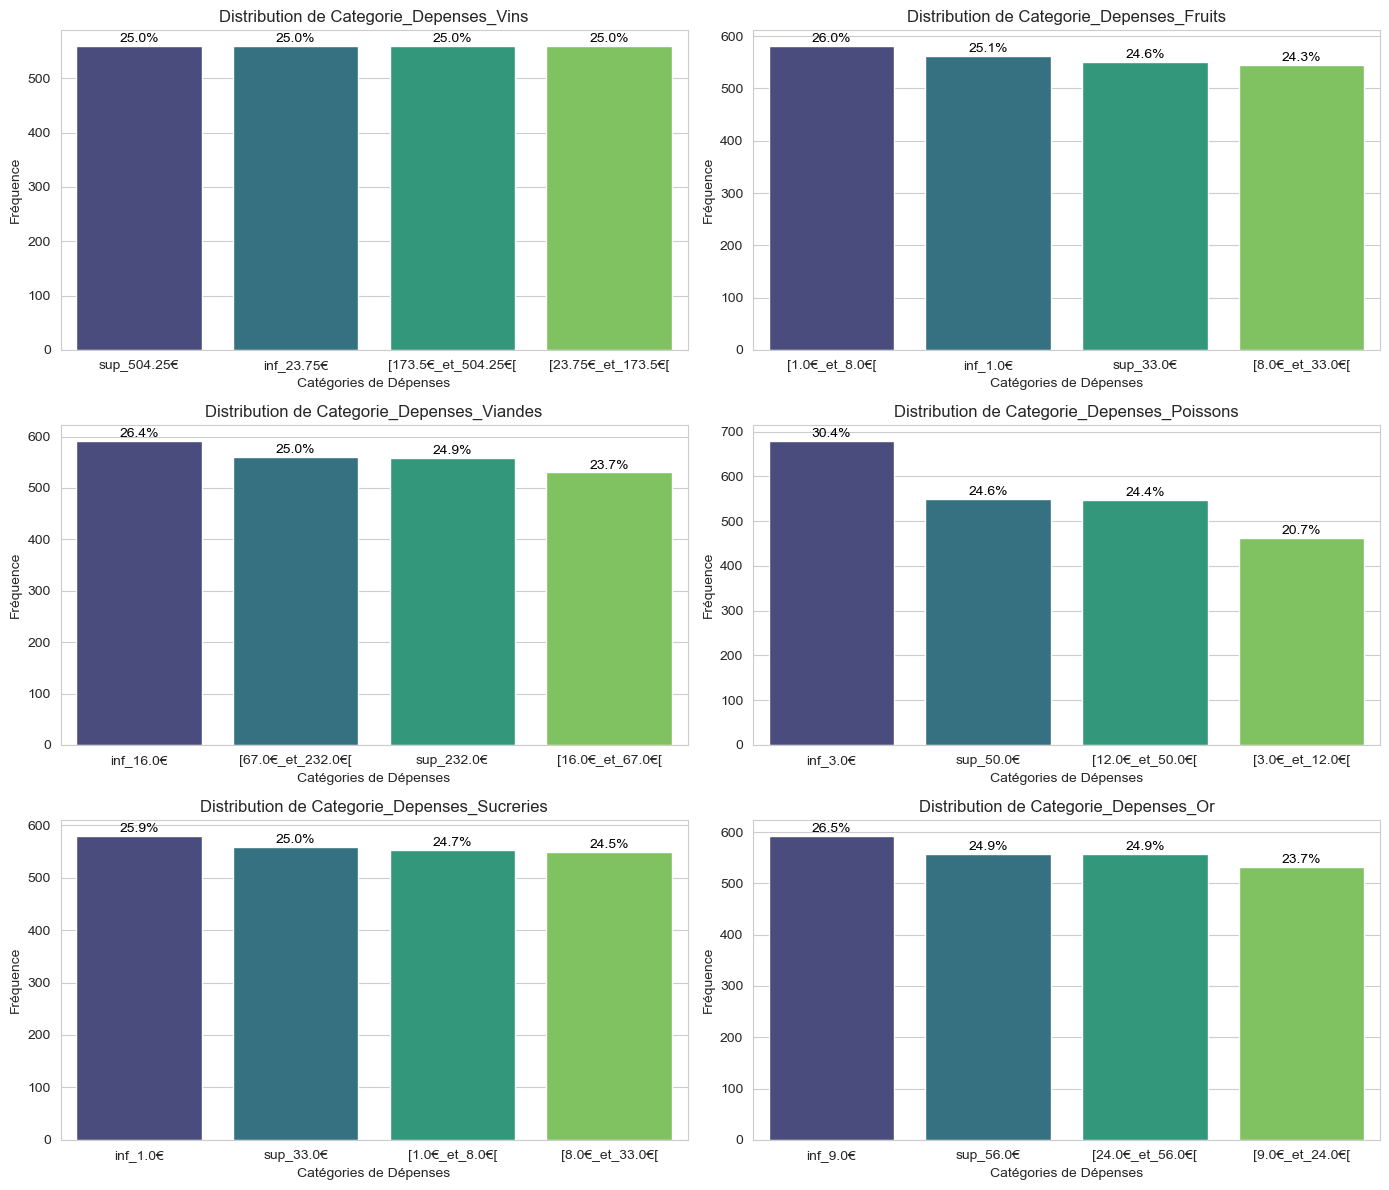

In [19]:
#Data Viz

with sns.axes_style("whitegrid"):
    # Création d'une figure avec plusieurs sous-graphiques
    fig, axes = plt.subplots(3, 2, figsize=(14, 12))
    axes = axes.flatten()  # Aplatir le tableau des axes pour un accès facile

    # Liste des colonnes de dépenses discrétisées à visualiser
    depense_cols = ['Categorie_Depenses_Vins', 'Categorie_Depenses_Fruits', 'Categorie_Depenses_Viandes', 
                    'Categorie_Depenses_Poissons', 'Categorie_Depenses_Sucreries', 'Categorie_Depenses_Or']

    # Parcours des colonnes pour créer des histogrammes
    for ax, col in zip(axes, depense_cols):
        total = len(data[col])  # Total pour le calcul des pourcentages
        order = data[col].value_counts().index  # Ordre basé sur la fréquence
        countplot = sns.countplot(x=col, data=data, ax=ax, palette='viridis', order=order)
        ax.set_title(f'Distribution de {col}')
        ax.set_xlabel('Catégories de Dépenses')
        ax.set_ylabel('Fréquence')
        
        # Ajout des pourcentages sur les barres
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height() / total)
            x = p.get_x() + p.get_width() / 2
            y = p.get_height()
            ax.annotate(percentage, (x, y), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

    plt.tight_layout()
    plt.show()

# Discrétisation Age :
On calcule d'abord l'Age. Après avoir calculé l'âge des individus, nous avons effectué une discrétisation en nous basant sur les quartiles de la distribution des âges. Cette approche a permis de diviser les âges en quatre catégories distinctes :

-Inférieur à 42 ans : Regroupe les jeunes adultes.

-Entre 42 et 49 ans : Correspond aux adultes moyens.

-Entre 49 et 60 ans : Représente les adultes supérieurs.

-Supérieur à 60 ans : Inclut les seniors.


In [23]:
data['Age']=2017-data['Annee_Naissance']
data['Date_Inscription']=pd.to_datetime(data['Date_Inscription'])
data['Anciennete']=2017-data['Date_Inscription'].dt.year

#Discrétisation:
def categorize_age(age):
    if age < 42:
        return 'inf_42_ans'  # Jeunes Adultes
    elif 42 <= age < 49:
        return '[42_et_49_ans]'  # Adultes Moyens
    elif 49 <= age < 60:
        return '[_49_et_60_ans]'  # Adultes Supérieurs
    else:
        return 'sup_60_ans'  # Seniors
##

data['Categorie_Age']=data['Age'].apply(categorize_age)




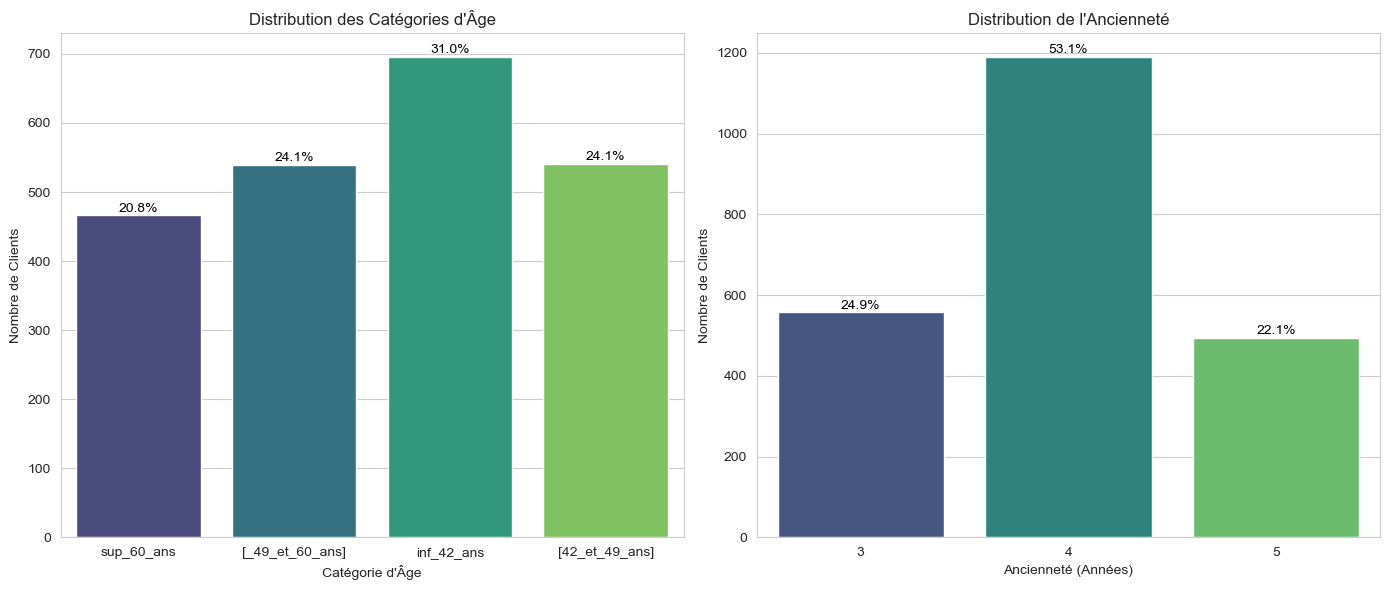

In [24]:
#==================#
#Data Viz#

with sns.axes_style("whitegrid"):
    # Création de deux sous-graphiques
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Histogramme pour l'âge discrétisé
    ax1 = sns.countplot(x='Categorie_Age', data=data, palette='viridis', ax=axes[0])
    ax1.set_title('Distribution des Catégories d\'Âge')
    ax1.set_xlabel('Catégorie d\'Âge')
    ax1.set_ylabel('Nombre de Clients')
    # Ajout des pourcentages sur les barres
    total_age = len(data['Categorie_Age'])
    for p in ax1.patches:
        percentage_age = '{:.1f}%'.format(100 * p.get_height() / total_age)
        ax1.annotate(percentage_age, (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', fontsize=10, color='black', 
                     xytext=(0, 5), textcoords='offset points')

    # Histogramme pour l'ancienneté
    ax2 = sns.countplot(x='Anciennete', data=data, palette='viridis', ax=axes[1])
    ax2.set_title('Distribution de l\'Ancienneté')
    ax2.set_xlabel('Ancienneté (Années)')
    ax2.set_ylabel('Nombre de Clients')
    # Ajout des pourcentages sur les barres
    total_anciennete = len(data['Anciennete'])
    for p in ax2.patches:
        percentage_anciennete = '{:.1f}%'.format(100 * p.get_height() / total_anciennete)
        ax2.annotate(percentage_anciennete, (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', fontsize=10, color='black', 
                     xytext=(0, 5), textcoords='offset points')

    plt.tight_layout()
    plt.show()


# Analyse des Catégories d'Âge et de l'Ancienneté

L'analyse de la distribution des catégories d'age nous montre: 

- La majorité de nos clients ont moins de 42 

- les clients les plus agés sont moins nombreux(plus de 60 ans) 

- On a un nombre significatif de clients qui ont une ancienneté de 4 , (Inscrits depuis 4 ans ), 5 ans constitue 22.1% de la base de donnée , quant aux clients ayant 3 ans avec nous , representent plus de 24% de la base de données 

Ainsi , nous constatons qu'on a pas mal de ns clients qui sont fidèles.

# Regroupement des modalités :
- Statut Marital : Les statuts peu fréquents tels que "Absurd" et "YOLO" ont été éliminés de notre jeu de données afin de mieux refléter les situations matrimoniales les plus courantes.

- Achats (Promos, Web, Catalogue, Magasin) : Les catégories d'achats ont été regroupées en fonction de leur fréquence, créant des intervalles clairs (0, 1, 2-4, 5-7, 8+). Ce regroupement facilite l'interprétation des habitudes d'achat des clients.

- Visites Web par Mois : De manière similaire, les visites web ont été regroupées en catégories significatives basées sur leur fréquence (0, 1, 2-4, 5-7, 8+), ce qui permet d'analyser de façon plus précise les comportements de navigation des utilisateurs.

Ces regroupements contribuent à réduire la fragmentation des données et à améliorer la clarté des analyses. En concentrant notre attention sur les catégories les plus pertinentes, nous sommes en mesure d'identifier plus facilement les tendances dominantes et les préférences de nos clients.

In [58]:
data = data[~data['Statut_Marital'].isin(['Absurd', 'YOLO'])]
data['Statut_Marital'] = data['Statut_Marital'].replace(['Divorced', 'Widow'], 'Divorcé/Veuve')
data['Statut_Marital'] = data['Statut_Marital'].replace(['Married', 'Together'], 'Marié/Ensemble')
data['Statut_Marital'] = data['Statut_Marital'].replace(['Single', 'Alone'], 'Seul/Célibataire')
data['Statut_Marital']

0       Seul/Célibataire
1       Seul/Célibataire
2         Marié/Ensemble
3         Marié/Ensemble
4         Marié/Ensemble
              ...       
2235      Marié/Ensemble
2236      Marié/Ensemble
2237       Divorcé/Veuve
2238      Marié/Ensemble
2239      Marié/Ensemble
Name: Statut_Marital, Length: 2236, dtype: object

In [22]:
def regroup_achats_visites(x):
    if x == 0:
        return '0'
    elif x == 1:
        return '1'
    elif x in [2, 3, 4]:
        return '2-4'
    elif x in [5, 6, 7]:
        return '5-7'
    else:
        return '8+'
    
for col in ['Achats_Promos', 'Achats_Web', 'Achats_Catalogue', 'Achats_Magasin', 'VisitesWeb_Mois']:
    data[col]=data[col].apply(regroup_achats_visites)

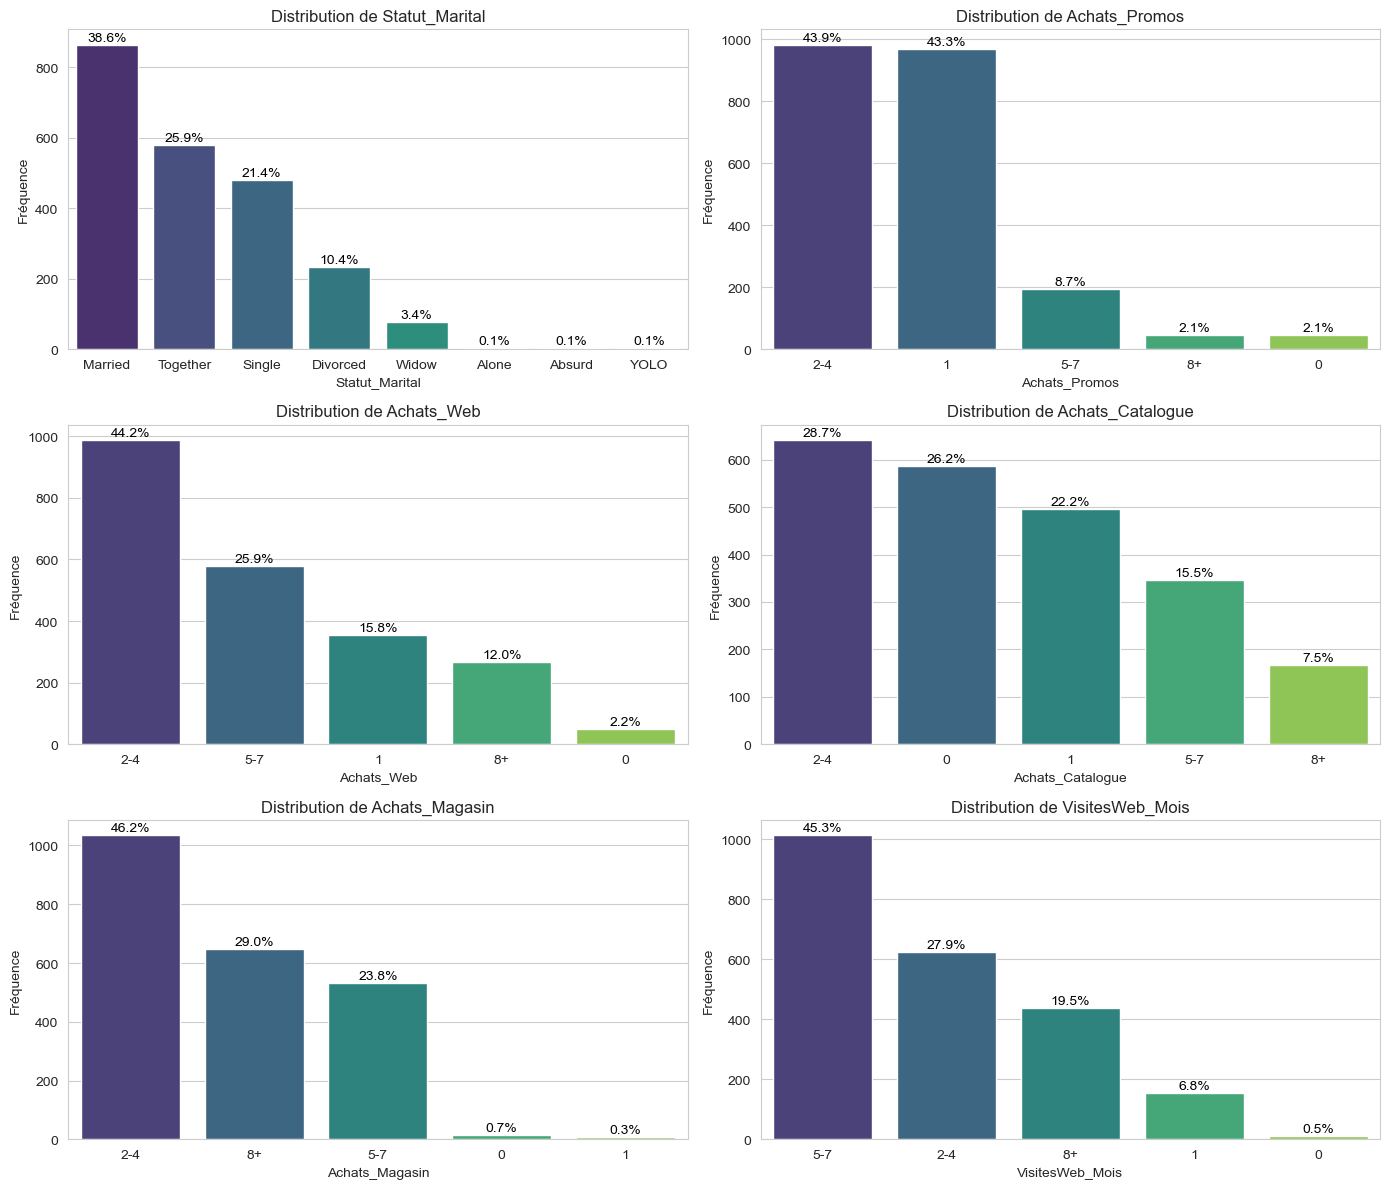

In [25]:
#============DataViz========#
import seaborn as sns
import matplotlib.pyplot as plt

with sns.axes_style("whitegrid"):
    # Création d'une figure avec plusieurs sous-graphiques
    fig, axes = plt.subplots(3, 2, figsize=(14, 12))
    axes = axes.flatten()  # Aplatir le tableau des axes pour un accès facile

    # Liste des colonnes à visualiser
    colonnes = ['Statut_Marital', 'Achats_Promos', 'Achats_Web', 'Achats_Catalogue', 'Achats_Magasin', 'VisitesWeb_Mois']

    # Parcours des colonnes pour créer des histogrammes
    for ax, col in zip(axes, colonnes):
        total = data[col].notnull().sum()  # Total pour le calcul des pourcentages
        order = data[col].value_counts().index  # Ordre basé sur la fréquence
        countplot = sns.countplot(x=col, data=data, ax=ax, palette='viridis', order=order)
        ax.set_title(f'Distribution de {col}')
        ax.set_xlabel(col)
        ax.set_ylabel('Fréquence')
        
        # Ajout des pourcentages sur les barres
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height() / total)
            x = p.get_x() + p.get_width() / 2
            y = p.get_height()
            ax.annotate(percentage, (x, y), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

    plt.tight_layout()
    plt.show()


# Analyse des Habitudes Clients par Catégories: 
Le regroupement des modalités des différentes variables a permis d'identifier des tendances comportementales marquantes parmi nos clients. Voici les principaux résultats :

- Statut Marital : La majorité des clients sont soit en couple (64,60%) soit célibataires (21,60%), tandis que 13,80% sont divorcés ou veufs.
- Achats Promotionnels : Les achats promotionnels sont principalement réalisés dans les catégories '2-4' et '1', ce qui indique une préférence pour des achats modérés en promotions.
- Achats en Ligne : Les clients achètent principalement en ligne dans les catégories '2-4' et '5-7', suggérant une activité régulière sur le site web avec un pic dans les achats fréquents.
- Achats via Catalogue : Une répartition équilibrée entre les catégories '2-4', '0' et '1' montre que le catalogue est utilisé de manière variable, avec une préférence pour les achats occasionnels.
- Achats en Magasin : La majorité des achats en magasin se concentrent dans les catégories '2-4' et '8+', mettant en évidence une tendance à la fois pour des achats modérés et plus importants.
- Visites Web Mensuelles : Les clients visitent principalement le site entre '5-7' et '2-4' fois par mois, ce qui reflète un engagement régulier mais modéré avec la plateforme.

Ces résultats offrent des insights précieux pour ajuster nos stratégies marketing, en ciblant des comportements spécifiques et en personnalisant l'engagement selon les préférences de chaque groupe de clients.

# Discrétisation de la Récence des Achats
La variable "Recence_Achat", qui mesure le nombre de jours écoulés depuis le dernier achat d'un client, est un indicateur essentiel de l'engagement et de la fidélité des clients. Pour faciliter son analyse, nous procéderons à une discrétisation en catégories basées sur ses quartiles.

Les quatre catégories que nous définirons sont les suivantes :

- Très Récent : Clients ayant effectué un achat récemment.
- Récent : Clients ayant effectué un achat dans les dernières semaines.
- Moyennement Ancien : Clients n'ayant pas acheté récemment, mais dans un passé proche.
- Ancien : Clients n'ayant pas effectué d'achats depuis une longue période.

Cette segmentation nous permettra de mieux comprendre les comportements d'achat en fonction du temps écoulé depuis le dernier achat. Elle facilitera l'adaptation des stratégies marketing en ciblant spécifiquement les groupes de clients en fonction de leur niveau d'engagement. En identifiant les clients les plus récents ou les moins actifs, nous pourrons personnaliser les efforts marketing pour réactiver les clients dormants ou renforcer la fidélité des clients réguliers.

In [26]:
def discretize_recency(value, quartiles):
    if value <= quartiles[0.25]:
        return "Très Récent"
    elif value <= quartiles[0.50]:
        return "Récent"
    elif value <= quartiles[0.75]:
        return "Moyennement Ancien"
    else:
        return "Ancien"
    

quartiles_recency = data['Recence_Achat'].quantile([0.25, 0.50, 0.75])

# Application de la discrétisation
data['Categorie_Recence_Achat'] = data['Recence_Achat'].apply(lambda x: discretize_recency(x, quartiles_recency))


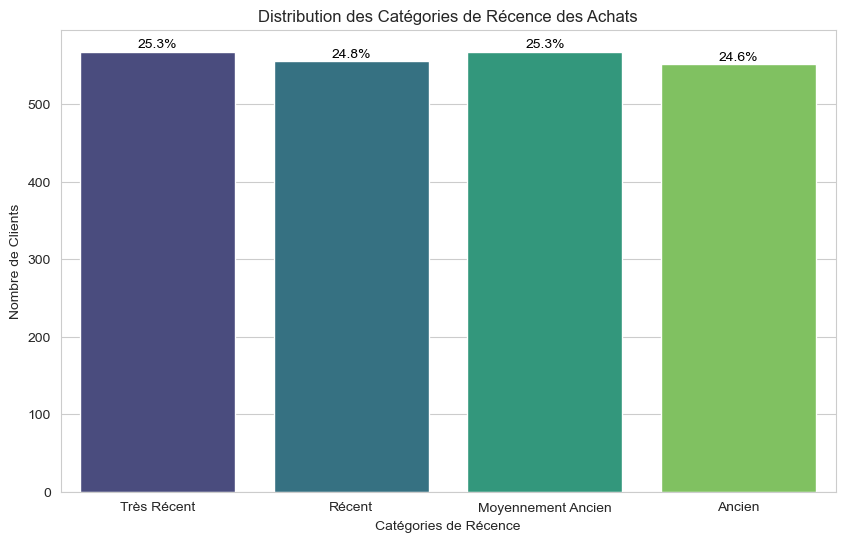

In [27]:
#=======DataViz======#
with sns.axes_style("whitegrid"):
    # Création de l'histogramme pour 'Categorie_Recence_Achat'
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(x='Categorie_Recence_Achat', data=data, palette='viridis', order=['Très Récent', 'Récent', 'Moyennement Ancien', 'Ancien'])
    ax.set_title('Distribution des Catégories de Récence des Achats')
    ax.set_xlabel('Catégories de Récence')
    ax.set_ylabel('Nombre de Clients')

    # Calcul du total pour les pourcentages
    total = len(data['Categorie_Recence_Achat'])

    # Ajout des pourcentages sur les barres
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', fontsize=10, color='black', 
                    xytext=(0, 5), textcoords='offset points')

    plt.show()

# Inteprétation des résultats:
La discrétisation de la variable 'Recence_Achat' en catégories basées sur le temps écoulé depuis le dernier achat met en évidence une répartition relativement équilibrée entre les différentes classes :

- *Moyennement Ancien* et *Très Récent* : Chaque catégorie regroupe environ 25.31% des clients, suggérant une proportion similaire entre ceux ayant effectué un achat récent et ceux dont l'achat remonte à plus longtemps.
- *Récent* : Cette catégorie représente 24.78% des clients, une proportion légèrement inférieure mais toujours proche des autres.
- *Ancien* : Avec 24.60%, cette catégorie concerne les clients dont le dernier achat date de plus longtemps.
- Cette répartition homogène indique une activité d'achat relativement stable au sein de la clientèle. 

Ces insights peuvent être exploités pour adapter les stratégies marketing, par exemple en réengageant les clients "Anciens" ou en fidélisant ceux de la catégorie "Très Récent".

# Data Cleaning:

Dans le cadre de la préparation de notre base de données pour des analyses plus avancées, un nettoyage rigoureux a été effectué. Ce processus a impliqué la suppression de certaines colonnes déjà traitées ou devenues inutiles pour les prochaines étapes.
- **Colonnes supprimées**:  Les variables d'origine, telles que Revenu, Âge, Année de Naissance, Date d'Inscription, diverses catégories de dépenses, ainsi que Récence d'Achat, ont été retirées. Ces variables ayant été discrétisées ou transformées, leurs versions brutes ne sont plus nécessaires.
- **Données conservées**:  Seules les versions transformées et discrétisées de ces variables ont été maintenues, garantissant une analyse plus pertinente et optimisée.

Cette étape permet d’alléger la base de données et de se concentrer sur les variables les plus pertinentes pour l'analyse bivariée et la modélisation à venir.

In [30]:
##Supprimons les colonnes inutiles: 
col_drop = ["Identifiant","Revenu", "Age", "Annee_Naissance", "Date_Inscription", 'Depenses_Vins', 'Depenses_Fruits', 'Depenses_Viandes', 'Depenses_Poissons', 'Depenses_Sucreries', 'Depenses_Or', 'Cout_Contact', 'Revenu_Z', 'Recence_Achat']
data_clean=data.drop(col_drop, axis=1)
data_clean

,Niveau_Education,Statut_Marital,Nb_Enfants,Nb_Adolescents,Achats_Promos,Achats_Web,Achats_Catalogue,Achats_Magasin,VisitesWeb_Mois,Campagne3_Acceptee,...,Categorie_Revenu,Categorie_Depenses_Vins,Categorie_Depenses_Fruits,Categorie_Depenses_Viandes,Categorie_Depenses_Poissons,Categorie_Depenses_Sucreries,Categorie_Depenses_Or,Anciennete,Categorie_Age,Categorie_Recence_Achat
0,Graduation,Single,0,0,2-4,8+,8+,2-4,5-7,0,...,"[51,381.5€_et_68,522€[",sup_504.25€,sup_33.0€,sup_232.0€,sup_50.0€,sup_33.0€,sup_56.0€,5,sup_60_ans,Moyennement Ancien
1,Graduation,Single,1,1,2-4,1,1,2-4,5-7,0,...,"[35,303€_et_51,381.5€[",inf_23.75€,inf_1.0€,inf_16.0€,inf_3.0€,inf_1.0€,inf_9.0€,3,sup_60_ans,Récent
2,Graduation,Together,0,0,1,8+,2-4,8+,2-4,0,...,"sup_68,522€",[173.5€_et_504.25€[,sup_33.0€,[67.0€_et_232.0€[,sup_50.0€,[8.0€_et_33.0€[,[24.0€_et_56.0€[,4,[_49_et_60_ans],Récent
3,Graduation,Together,1,0,2-4,2-4,0,2-4,5-7,0,...,"inf_35,303€",inf_23.75€,[1.0€_et_8.0€[,[16.0€_et_67.0€[,[3.0€_et_12.0€[,[1.0€_et_8.0€[,inf_9.0€,3,inf_42_ans,Récent
4,PhD,Married,1,0,5-7,5-7,2-4,5-7,5-7,0,...,"[51,381.5€_et_68,522€[",[23.75€_et_173.5€[,sup_33.0€,[67.0€_et_232.0€[,[12.0€_et_50.0€[,[8.0€_et_33.0€[,[9.0€_et_24.0€[,3,inf_42_ans,Ancien
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduation,Married,0,1,2-4,8+,2-4,2-4,5-7,0,...,"[51,381.5€_et_68,522€[",sup_504.25€,sup_33.0€,[67.0€_et_232.0€[,[12.0€_et_50.0€[,sup_33.0€,sup_56.0€,4,[_49_et_60_ans],Récent
2236,PhD,Together,2,1,5-7,8+,2-4,5-7,5-7,0,...,"[51,381.5€_et_68,522€[",[173.5€_et_504.25€[,inf_1.0€,[16.0€_et_67.0€[,inf_3.0€,inf_1.0€,inf_9.0€,3,sup_60_ans,Moyennement Ancien
2237,Graduation,Divorced,0,0,1,2-4,2-4,8+,5-7,0,...,"[51,381.5€_et_68,522€[",sup_504.25€,sup_33.0€,[67.0€_et_232.0€[,[12.0€_et_50.0€[,[8.0€_et_33.0€[,[9.0€_et_24.0€[,3,inf_42_ans,Ancien
2238,Master,Together,0,1,2-4,5-7,5-7,8+,2-4,0,...,"sup_68,522€",[173.5€_et_504.25€[,[8.0€_et_33.0€[,[67.0€_et_232.0€[,sup_50.0€,[8.0€_et_33.0€[,sup_56.0€,3,sup_60_ans,Très Récent


# Analyse Bivariée:
Après le traitement et la discrétisation des données, nous passons à une étape clé : l’analyse bivariée. Cette phase vise à explorer les relations entre différentes paires de variables afin de mieux comprendre leurs interactions et leur impact sur le comportement des clients.

Nous mettons l’accent sur des variables stratégiques pour identifier des tendances et des schémas significatifs. Cette analyse est essentielle pour affiner notre compréhension des données et poser les bases d’une modélisation prédictive efficace.

Par ailleurs, cette étape nous permet d’examiner les différences entre les clients ayant répondu positivement aux offres de la campagne publicitaire et ceux qui ne l’ont pas fait. Identifier les caractéristiques qui distinguent ces deux groupes est crucial pour l’entreprise, car cela permet d’optimiser les stratégies marketing et de mieux cibler les segments les plus réceptifs. Une approche plus ciblée améliorerait l’efficacité des campagnes et maximiserait le taux de conversion.

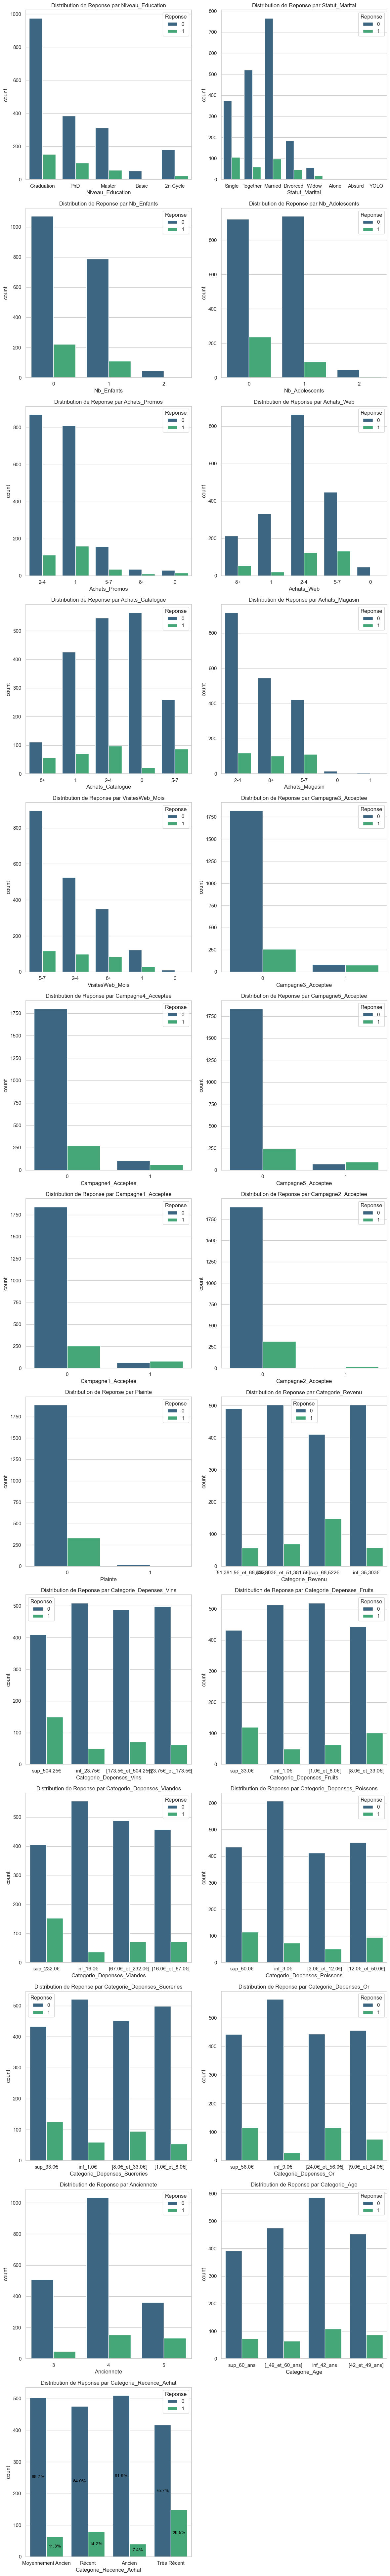

In [37]:
cible = 'Reponse'
variables_to_analyze = [col for col in data_clean.columns if col != cible]
sns.set(style="whitegrid")
num_graphs_per_row = 2
num_rows = len(variables_to_analyze) // num_graphs_per_row + (len(variables_to_analyze) % num_graphs_per_row > 0)

fig, axes = plt.subplots(num_rows, num_graphs_per_row, figsize=(12, num_rows * 6))
axes = axes.flatten() 

for i, var in enumerate(variables_to_analyze):
    ax = axes[i]
    sns.countplot(x=var, hue=cible, data=data_clean, palette='viridis', ax=ax)
    ax.set_title(f'Distribution de {cible} par {var}')
proportions = data_clean.groupby(var)[cible].value_counts(normalize=True).unstack() * 100
for p in ax.patches:
        height = p.get_height()
        if np.isnan(height):
            continue  # Ignore les barres sans données
        width, x, y = p.get_width(), p.get_xy()[0], p.get_xy()[1]
        cat = p.get_x() + width / 2
        cat_val = ax.get_xticklabels()[int(cat)].get_text()
        total_count = data_clean[data_clean[var] == cat_val][cible].count()
        percentage = '{:.1f}%'.format(100 * height / total_count)
        ax.annotate(percentage, (x + width / 2, y + height / 2), 
                    ha='center', va='center', fontsize=10, color='black')
    
for j in range(i+1, num_rows * num_graphs_per_row):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Interprétation : 

Notre analyse bivariée a mis en évidence des relations clés entre les caractéristiques des clients et leur propension à répondre aux campagnes marketing.

- **Niveau d'éducation** : Les clients titulaires d’un doctorat (PhD) affichent le taux de réponse le plus élevé (20.78%), tandis que ceux ayant un niveau ‘2ᵉ Cycle’ présentent le plus faible (10.84%). Cela souligne l'influence du niveau d’éducation sur la réceptivité aux offres.
- **Statut marital** : Les clients classés dans la catégorie "Autres" montrent un taux de réponse élevé (42.86%), tandis que les personnes mariées réagissent moins favorablement (11.34%). Ce facteur semble jouer un rôle dans l’efficacité des campagnes.
- **Composition familiale**: Les ménages sans enfants (17.17%) et sans adolescents réagissent davantage aux campagnes, suggérant une influence du mode de vie sur les décisions d’achat.
- **Habitudes d'achat** : Les clients effectuant des achats en grande quantité, notamment via les promotions et le web, répondent plus positivement aux campagnes. Par exemple, 21.74% des clients ayant réalisé plus de 8 achats promotionnels ont manifesté un intérêt.
- **Historique des campagnes**:  La participation aux campagnes précédentes est un excellent indicateur des réponses futures. En particulier, 56.44% des clients ayant réagi à la Campagne 5 ont répondu favorablement aux offres suivantes.
- **Pouvoir d'achat** : Les clients à revenu élevé et avec des dépenses importantes, notamment en vins, montrent une plus grande propension à répondre, confirmant une corrélation entre les moyens financiers et la réceptivité marketing.
- **Ancienneté et âge** :  Les clients plus anciens et les jeunes adultes affichent un intérêt plus marqué pour les offres.
- **Récence des achats**: Plus un achat a été effectué récemment, plus le client est susceptible de répondre à une nouvelle sollicitation.

En somme , Ces insights permettent d’orienter efficacement les futures campagnes marketing en affinant le ciblage des segments les plus réceptifs, optimisant ainsi les performances et le taux de conversion.


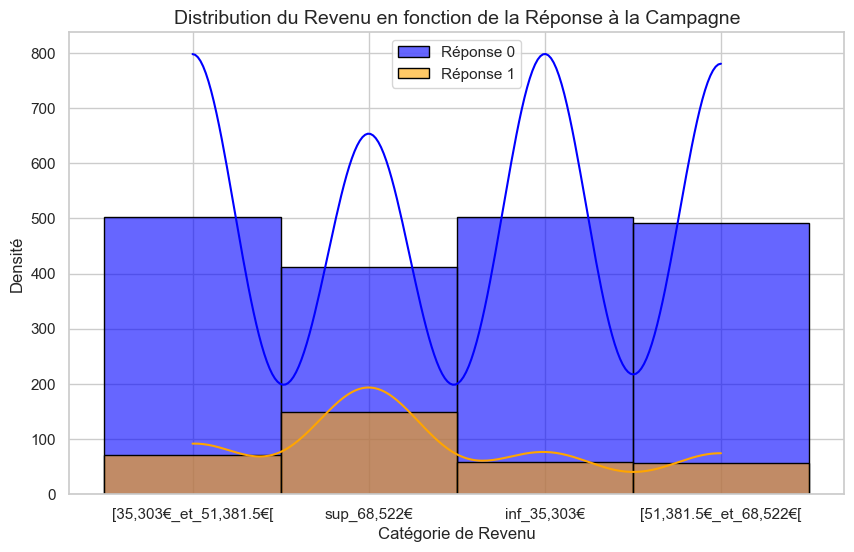

In [39]:
with sns.axes_style("whitegrid"):
    plt.figure(figsize=(10, 6))

    # Histogramme des revenus pour les clients qui n'ont pas répondu (Réponse == 0)
    sns.histplot(
        data_clean[data_clean['Reponse'] == 0]['Categorie_Revenu'], 
        kde=True, color='blue', edgecolor='black', label='Réponse 0', alpha=0.6
    )

    # Histogramme des revenus pour les clients qui ont répondu (Réponse == 1)
    sns.histplot(
        data_clean[data_clean['Reponse'] == 1]['Categorie_Revenu'], 
        kde=True, color='orange', edgecolor='black', label='Réponse 1', alpha=0.6
    )

    # Ajout des titres et labels
    plt.title('Distribution du Revenu en fonction de la Réponse à la Campagne', fontsize=14)
    plt.xlabel('Catégorie de Revenu', fontsize=12)
    plt.ylabel('Densité', fontsize=12)
    plt.legend()
    plt.show()


# Interpretation

L'examen de la variable "Revenu" révèle des similarités initiales entre les deux groupes de clients. Cependant, une distinction marquée émerge au sein du groupe ayant manifesté un intérêt pour la campagne. En effet, la distribution des revenus dans ce segment présente deux pics, avec une concentration plus marquée à mesure que les salaires augmentent. À l’inverse, le second groupe affiche une répartition plus homogène, centrée autour de la moyenne. Ces observations suggèrent une corrélation potentielle entre un revenu plus élevé et l’intérêt pour la campagne, tandis que l’autre groupe se distingue par une distribution de revenus plus équilibrée.



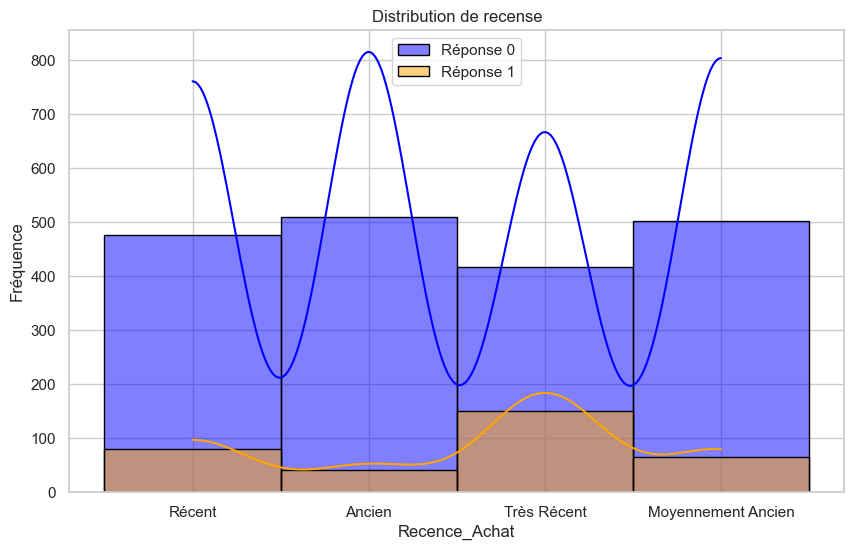

In [41]:
with sns.axes_style("whitegrid"):
    # Création d'un histogramme pour la variable 'Revenu'
    plt.figure(figsize=(10, 6))
    
    # Tracer l'histogramme pour la modalité 0 (Réponse == 0) en bleu
    sns.histplot(data_clean[data_clean['Reponse'] == 0]['Categorie_Recence_Achat'], kde=True, color='blue', edgecolor='black', label='Réponse 0')

    # Tracer l'histogramme pour la modalité 1 (Réponse == 1) en orange
    sns.histplot(data_clean[data_clean['Reponse'] == 1]['Categorie_Recence_Achat'], kde=True, color='orange', edgecolor='black', label='Réponse 1')

    plt.title('Distribution de recense')
    plt.xlabel('Recence_Achat')
    plt.ylabel('Fréquence')
    plt.legend()
    plt.show()

# Interprétation : 

Cette analyse met en évidence une différence notable dans les comportements d'achat des clients en fonction de leur récence d'achat. En effet, les clients ayant répondu positivement à la campagne publicitaire ont, en moyenne, effectué un achat plus récemment que ceux qui n'ont pas manifesté d'intérêt.

Cette tendance suggère que la récence d'achat pourrait être un indicateur clé du niveau d'engagement des clients vis-à-vis de la marque. Les clients plus récents semblent entretenir une relation plus active avec l'entreprise, ce qui pourrait expliquer leur réceptivité accrue aux offres promotionnelles. À l'inverse, les clients dont l'achat remonte à plus longtemps affichent une moindre réactivité aux campagnes, suggérant un engagement plus faible ou une fidélité moindre.

Ces résultats soulignent l'importance de la récence d'achat comme critère de ciblage potentiel pour optimiser les stratégies marketing et maximiser l'impact des campagnes publicitaires.